197070544-9

Machine Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#%cd "/content/drive/MyDrive/Colab Notebooks/Tarea MNIST/Fashion-MNIST"
%cd "/content/drive/MyDrive/Colab Notebooks/Tarea MNIST"
#%cd ..

/content/drive/MyDrive/Colab Notebooks/Tarea MNIST


In [ ]:
ls

'Copia de Tarea MNIST.ipynb'
 EjemploRNA.ipynb
 EjemploSVM.ipynb
 Fashion-MNIST/
 input_data.py
'Tarea MNIST - Christopher Cárdenas A.ipynb'


In [ ]:
#pip install tensorflow_decision_forests

In [ ]:
#pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached wurlitzer-3.0.2-py3-none-any.whl (7.3 kB)


##Librerías y Parámetros

In [ ]:
%matplotlib notebook
import tensorflow as tf
import torch as pt
# from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib import pyplot as plt2
#import input_data.py
from os.path import sep
from tqdm import tqdm
from sklearn import svm
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.utils.multiclass import unique_labels
from sklearn.datasets import make_moons, make_classification, load_digits
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, NuSVC
import pandas as pd
import random
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.activations import sigmoid
#import tensorflow_decision_forests as tfdf
from sklearn.metrics import ConfusionMatrixDisplay

import scipy
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score


# Parámetros de entrenamiento
minibatch_size = 32
max_epochs = 100
max_validation_checks = 25

# Parámetros de gradiente descendente estocástico
#Todo el mundo usa adam por encima del sgd, aunque en teoria es un poco peor para problemas de clasificacion de imagenes
#opt = tf.keras.optimizers.Adam(learning_rate=0.01)

opt = tf.keras.optimizers.SGD(learning_rate=0.01)  #Estuve unas 4 horas viendo por que el acc no subia de 0.1000, era porque tenia dividida la variable Y sin darme cuenta,
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)   #La misma porqueria
#opt = tf.keras.optimizers.SGD(learning_rate=1)
#opt = tf.keras.optimizers.SGD(learning_rate=10)    #No hay caso

# Parámetros de SVM
#opt =


#Parámetros de Random Forest


# Función de pérdida: 'cross_entropy' or 'mse'
loss_function_name = 'sparse_categorical_crossentropy'

# Parámetros de configuración de la red
n_inputs = 28*28    # Número de entradas
#n_hidden = 25      # Número de neuronas en la capa oculta
n_hidden = 100
#n_hidden = 10
#n_hidden = 100
n_classes = 10       # Número de salidas de la red softmax
n_neurons = (n_inputs, n_hidden, n_classes)
# n_neurons = (n_inputs,  n_classes)   # Descomente para eliminar capa oculta

# log dir
experiment_name = "default"
folder_repet   = "1"         # Cambiar valor cuando realice repeticiones de los experimentos
logdir = "tarea_1_logs" + sep + experiment_name + sep + folder_repet

##Dataset Fashion-MNIST

In [ ]:

#Descarga el dataset y lo enchufa en las variables, de forma pre-randomizada
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "\n y_train shape:", y_train.shape)
#x_train shape: (60000, 28, 28) y_train shape: (60000,)

print("x_test>",x_test.shape, "\n y_test>", y_test.shape)
#x_test> (10000, 28, 28) y_test> (10000,)
#las imagenes contenidas en x_test poseen un tamaño de 28x28 pixeles, son 60000
#las etiquetas estan contenidas en y_test, representados en numeros de 0 a 9

#print(x_train[0])
#print(y_test[])

#One Hot, ej. 0010000; 1 digito es un cero; one cold es lo contrario. No me resulta la porqueria, pero lei que dividir por 255 tiene el mismo efecto, y funciona, asi que lo dejo con eso.
x_train = (x_train / 255.0)
x_test = (x_test / 255.0)


x_train shape: (60000, 28, 28) 
 y_train shape: (60000,)
x_test> (10000, 28, 28) 
 y_test> (10000,)


##Visualizar datos del dataset

Img. Index gen:  56521
y = 8 Bolso


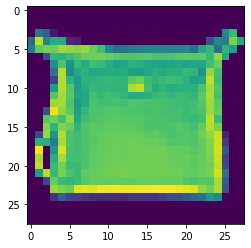

In [ ]:

# Define the text labels
fashion_mnist_labels = ["Polera sin mangas",  # index 0
                        "Pantalon",      # index 1
                        "Poleron",       # index 2
                        "Vestido",       # index 3
                        "Abrigo",        # index 4
                        "Sandalia",      # index 5
                        "Polera",        # index 6
                        "Zapatillas",    # index 7
                        "Bolso",         # index 8
                        "Botines"]       # index 9

# Image index, any number between 0 and 59,999
img_index = random.randrange(60000)
print("Img. Index gen: ",img_index)
# y_train contains the labels, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Show one of the images from the training dataset
plt.imshow(x_train[img_index])

##Modelo

In [ ]:

#modelo

model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(), #Crea el array de 28*28
    tf.keras.layers.Dense(n_hidden, activation=tf.nn.sigmoid), #Neuronas ocultas con funcion de activacion sigmoide, aunque he leido varias veces que relu es mejor
    #tf.keras.layers.Dense(n_classes, activation=tf.nn.softmax_cross_entropy_with_logits(y_train))]  #Capa de salida por softmax, deben ser 10, porque hay 10 etiquetas
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
)

#model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
#model.compile(optimizer = tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=3)  #Funciona pero no es exacto con el enunciado


#epochs arriba

history = model.fit(x_train, y_train, batch_size=minibatch_size, validation_split=0.3, shuffle=True, epochs=max_epochs)


Epoch 1/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.4366 - accuracy: 0.6499 - val_loss: 1.0014 - val_accuracy: 0.7264
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8760 - accuracy: 0.7371 - val_loss: 0.7813 - val_accuracy: 0.7499
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7360 - accuracy: 0.7572 - val_loss: 0.6930 - val_accuracy: 0.7644
Epoch 4/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6676 - accuracy: 0.7730 - val_loss: 0.6397 - val_accuracy: 0.7783
Epoch 5/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6238 - accuracy: 0.7854 - val_loss: 0.6040 - val_accuracy: 0.7904
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5916 - accuracy: 0.7963 - val_loss: 0.5791 - val_accuracy: 0.7987
Epoch 7/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5672 - accuracy: 0.8037 - val_loss: 0.5563 - val_ac

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.evaluate(x_test, y_test)
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=minibatch_size)
#train_loss
#train_accuracy

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8804


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=minibatch_size)
#test_loss
#test_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3905 - accuracy: 0.8598


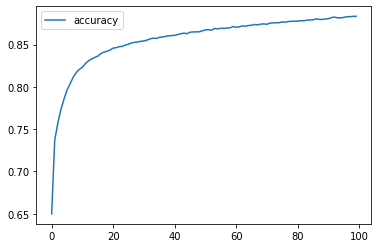

In [ ]:
# plot the accuracy of the model as it trains
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])


Img. Index gen:  5008
313/313 [==============================] - 1s 2ms/step
[1.25e-02 1.00e-02 2.54e-02 2.20e-02 9.11e-01 1.04e-06 3.60e-03 1.20e-05
 1.52e-02 1.04e-06]

Prediccion del modelo: 4

Respuesta correcta: 4


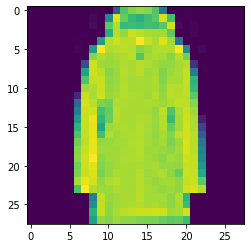

In [ ]:
#Test de la nn

# Image index, any number between 0 and 59,999
img_index = random.randrange(10000)
print("Img. Index gen: ",img_index)

classifications = model.predict(x_test)

print(classifications[img_index])
plt.imshow(x_test[img_index])
result = np.where(classifications[img_index] == max(classifications[img_index]))

#print("max> ", max(classifications[img_index]))
#print(result)

print(f"\nPrediccion del modelo: {result[0][0]}")

print(f"\nRespuesta correcta: {y_test[img_index]}")

##Display de 15 Resultados

313/313 [==============================] - 1s 3ms/step


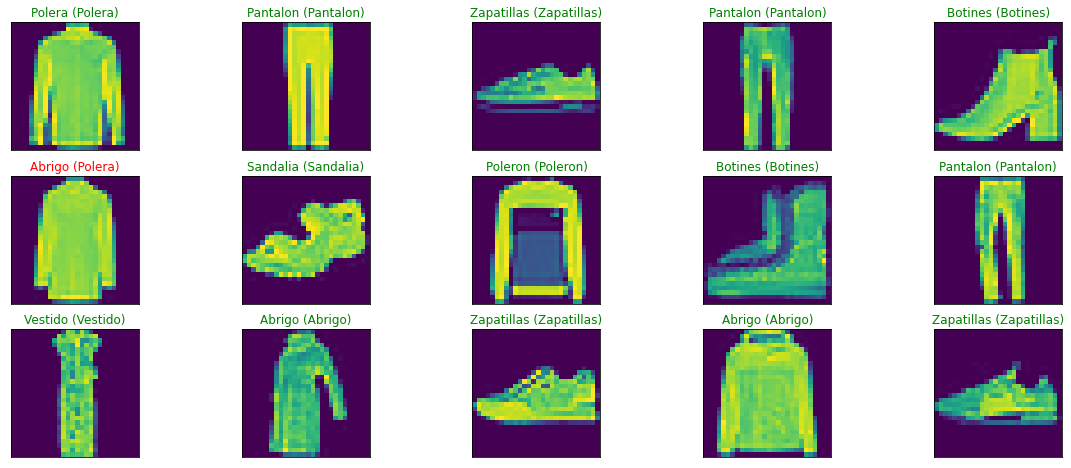

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

##Quito una dimension para ver resultados con matriz de confusion

In [ ]:
nsamples, nx, ny = x_train.shape
d2_train_dataset_train = x_train.reshape(nsamples,nx*ny)

nsamples, nx, ny = x_test.shape
d2_train_dataset_test = x_test.reshape(nsamples,nx*ny)

d2_train_dataset_train.shape
d2_train_dataset_test.shape


(10000, 784)

Confusion matrix, without normalization
[[845   3   7  44   3   2  84   0  12   0]
 [  4 955   6  28   5   0   1   0   1   0]
 [ 18   4 762   8 128   0  74   0   6   0]
 [ 32   8  13 878  31   0  35   0   3   0]
 [  0   2 103  36 774   0  83   0   2   0]
 [  0   0   0   1   0 917   0  56   3  23]
 [165   1 114  34  93   0 564   0  29   0]
 [  0   0   0   0   0  31   0 940   0  29]
 [  3   1   6   6   1   3  15   3 962   0]
 [  0   0   0   0   0  18   0  46   1 935]]
Normalized confusion matrix
[[0.84 0.   0.01 0.04 0.   0.   0.08 0.   0.01 0.  ]
 [0.   0.95 0.01 0.03 0.01 0.   0.   0.   0.   0.  ]
 [0.02 0.   0.76 0.01 0.13 0.   0.07 0.   0.01 0.  ]
 [0.03 0.01 0.01 0.88 0.03 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.1  0.04 0.77 0.   0.08 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.92 0.   0.06 0.   0.02]
 [0.17 0.   0.11 0.03 0.09 0.   0.56 0.   0.03 0.  ]
 [0.   0.   0.   0.   0.   0.03 0.   0.94 0.   0.03]
 [0.   0.   0.01 0.01 0.   0.   0.01 0.   0.96 0.  ]
 [0.   0.   0.   0.   0.

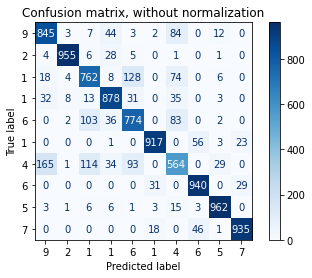

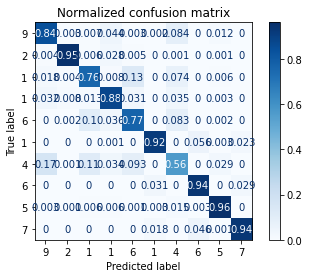

In [ ]:


classifier = svm.SVC(kernel="linear", C=0.01).fit(d2_train_dataset_train, y_train)

np.set_printoptions(precision=2)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        d2_train_dataset_test,
        y_test,
        display_labels=y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#SVM

In [ ]:
# Calculate means
Xmean = x_train.mean(axis=0)

# Substract means
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean


In [ ]:
classifier = SVC(kernel='rbf', C=1, gamma='auto', probability=True)

classifier.fit(d2_train_dataset_train, y_train)


fig = plt.figure(figsize=(9, 8))

ax = fig.add_subplot(2, 2, 1)
y_pred = classifier.predict(x_test)
clr=np.asarray(['b','g'])
ax.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], c=clr[y_pred[y_test==0]],
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=40, label='Clase 1')
ax.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], c=clr[y_pred[y_test==1]],
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=0, alpha=0.5, s=40, label='Clase 2')
plt.title('Clasificaci\'on en el conjunto de test')

In [ ]:



ax = fig.add_subplot(2, 2, 3)
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Probabilidad de clasificaci\'on')

ax = fig.add_subplot(2, 2, 2)
y_pred = classifier.predict_proba(x_test)
fpr, tpr, th = roc_curve(y_test, y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area bajo la curva ROC (test): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(y_train, classifier.predict_proba(x_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area bajo la curva ROC (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('curva ROC')
plt.grid()

ax = fig.add_subplot(2, 2, 4)
ax.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='b',
           marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='g',
           marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
ax.scatter(x_train[classifier.support_, 0], x_train[classifier.support_, 1],
           c='r', linewidth=1, alpha=0.25, s=100)
plt.title('Vectores de soporte')

plt.tight_layout()
print("%d SVs para la clase 1" % (classifier.n_support_[0]))
print("%d SVs para la clase 2" % (classifier.n_support_[1]))